# `01` Import Necessary Libraries

## `i` Default Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [4]:
from sklearn.impute import KNNImputer , SimpleImputer
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


----------------------------

# `02` Load & Split Data

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [5]:
data = pd.read_csv('Data/train.csv')

C:\Users\PCCV\AppData\Local\Temp\ipykernel_16600\487555319.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data/train.csv')


In [6]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.



In [37]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## HANDLING CORRUPTED DATA 

In [10]:
data['Annual_Income'] = data['Annual_Income'].str.replace("_" , "").astype(float)
if data['Annual_Income'].dtype == 'object':
    data['Annual_Income'].str.replace("," , "").astype(float)
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.replace("_" , "").astype(float)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].str.replace("_" , "")
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].replace("", np.nan).astype(float)
data['Credit_Mix'] = data['Credit_Mix'].str.replace("_" , "")
data['Credit_Mix'] = data['Credit_Mix'].replace("", np.nan)
data['Occupation'] = data['Occupation'].str.replace("_" , "")
data['Occupation'] = data['Occupation'].replace("", np.nan)
data['Payment_Behaviour'] = data['Payment_Behaviour'].str.replace("!@9#%8" , "")
data['Payment_Behaviour'] = data['Payment_Behaviour'].replace("", np.nan)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Convert columns to numeric, invalid parsing will be set as NaN

In [11]:
columns_to_convert = ['Monthly_Balance','Amount_invested_monthly','Annual_Income','Age', 'Num_of_Loan', 'Outstanding_Debt', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit']

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

# Null Values increase after 
# (fixing corrupted data and converting columns to numeric)

In [43]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                          4939
SSN                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

# Filtering Outliers by IQR

In [12]:
columns_to_remove_outliers = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
  'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
   'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
   'Amount_invested_monthly','Monthly_Balance'
]

for column in columns_to_remove_outliers:
    Q1 = data[column].quantile(0.15)
    Q3 = data[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), np.nan, data[column])

# Dropping unnecessary columns

In [13]:
data = data.drop(columns=['Name' ,'Customer_ID', 'ID', 'SSN','Month'])

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>]], dtype=object)

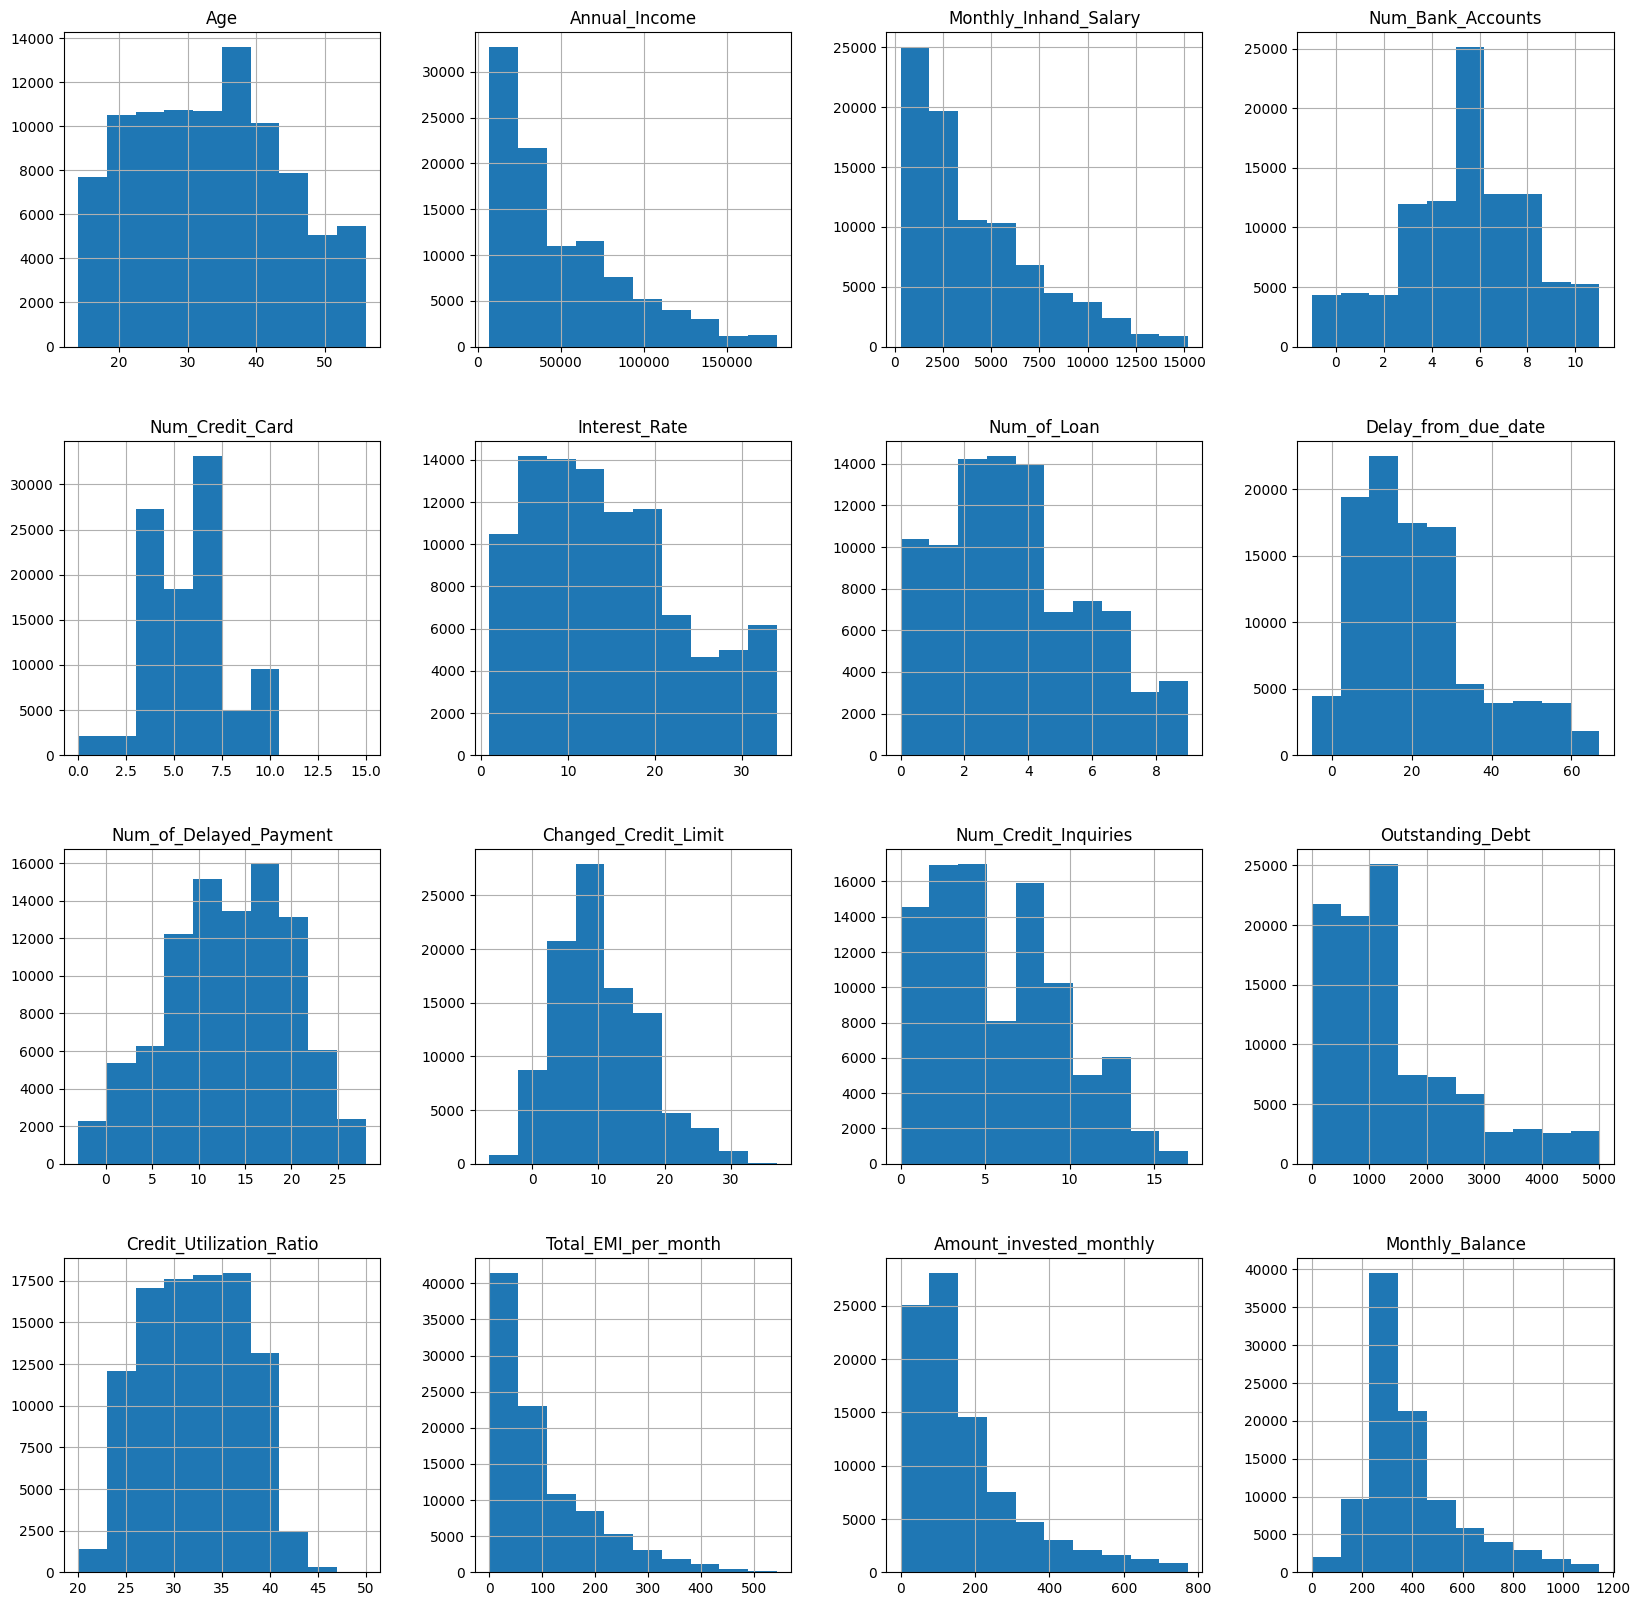

In [14]:
data.hist(figsize=(20,20))

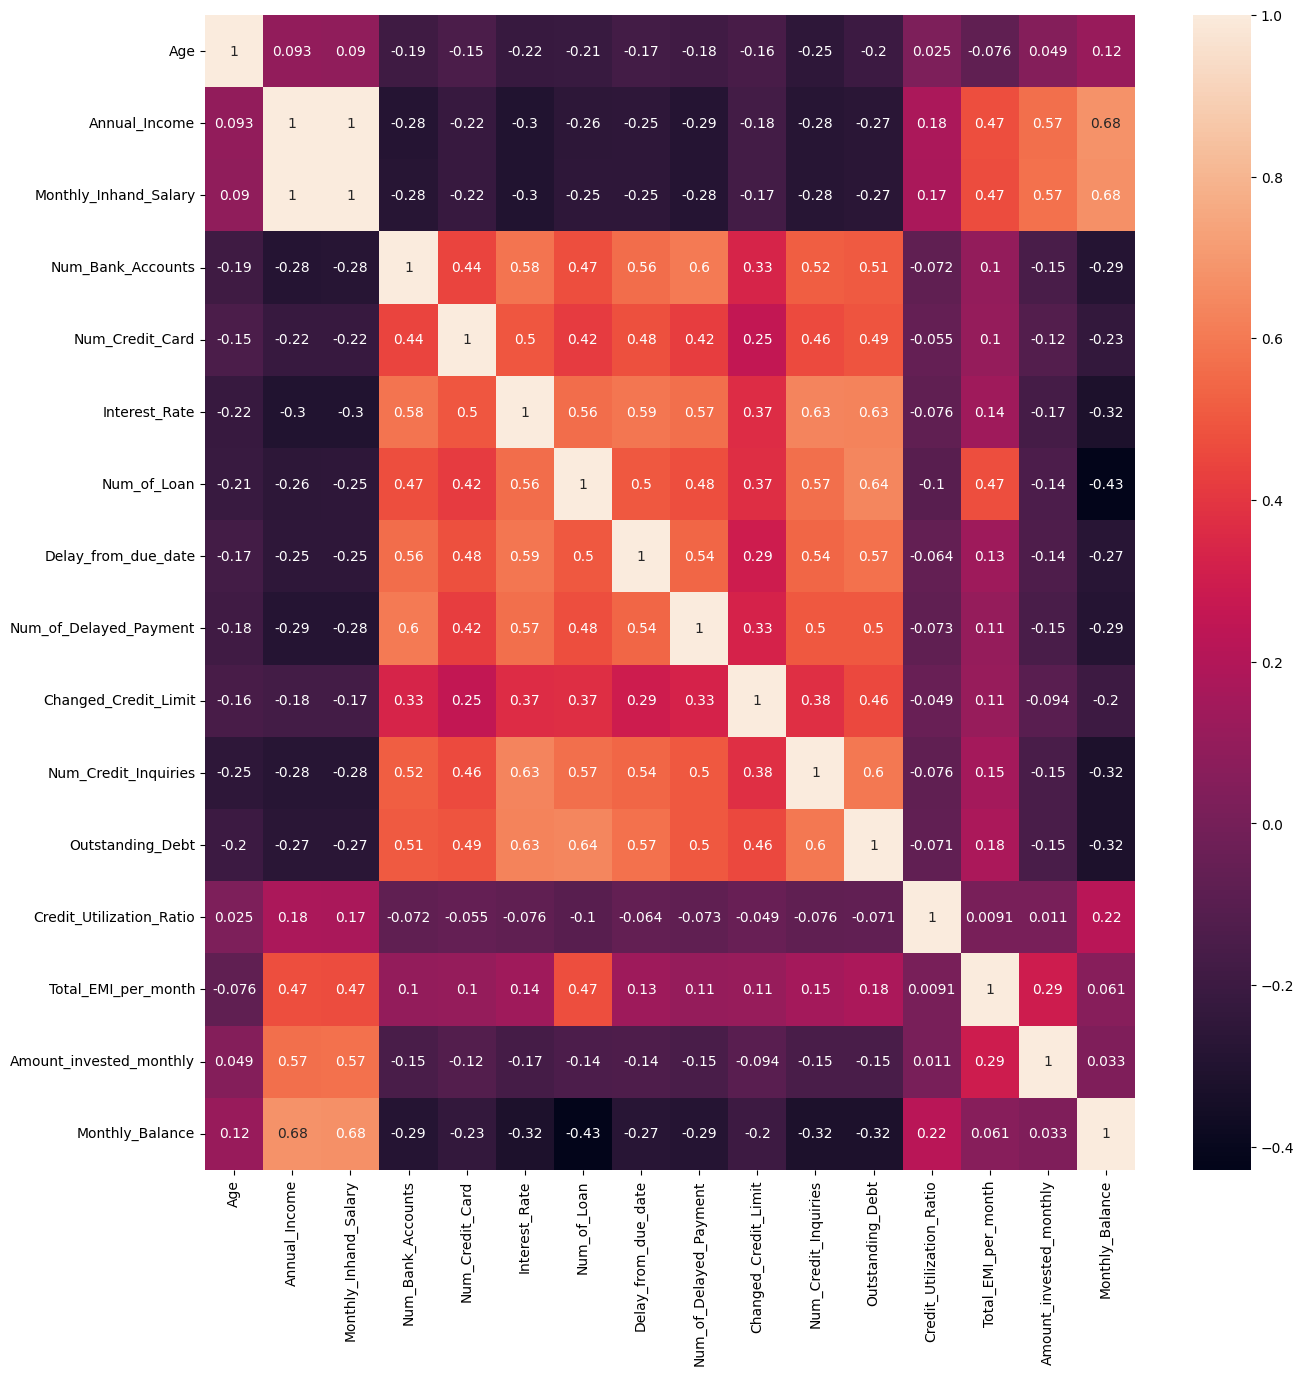

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

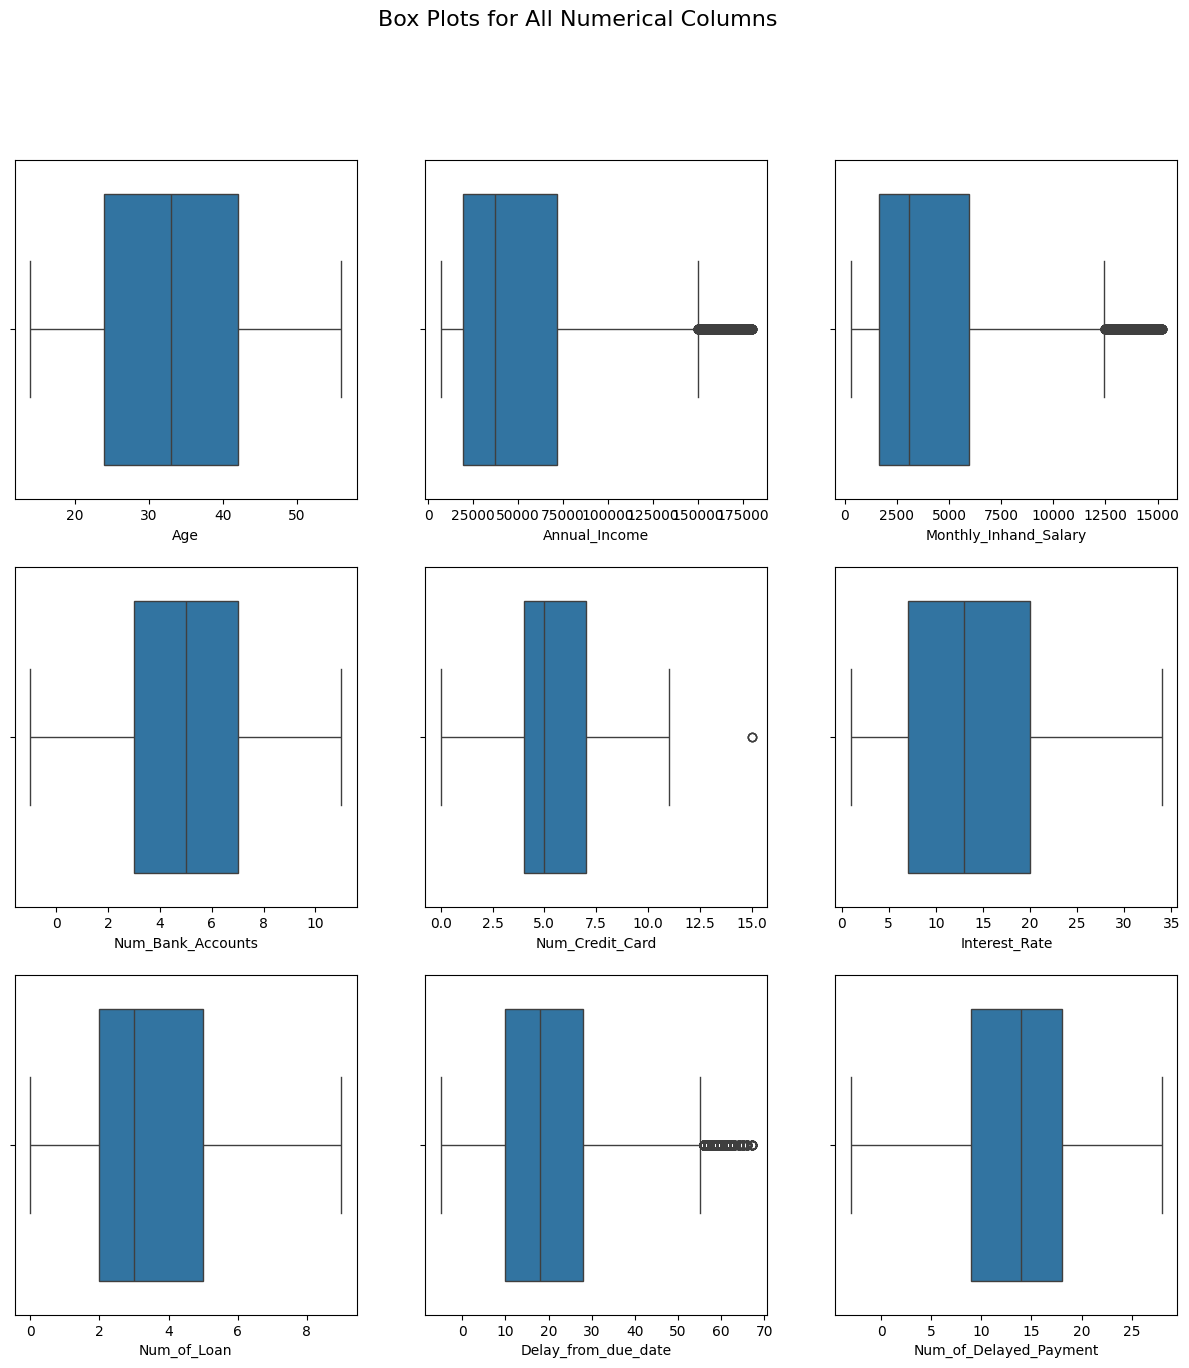

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

numerical_columns = data.select_dtypes(include=[np.number]).columns

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(x=data[column], ax=ax)

plt.show()

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.


# `Splitting` Train set into X & Y (Train & Test)

In [46]:
X = data.drop('Credit_Score'  , axis=1)
Y = data['Credit_Score']
x_train , x_test  , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=88 )
x_train2 , x_test2  , y_train2 , y_test2 = train_test_split(X , Y , test_size=0.2 , random_state=88 )

# `ENCODING` The train data with ordinal & label encoding 

In [47]:
ordinal_encoding = OrdinalEncoder()
label_encoding = LabelEncoder()

In [48]:
categorical_columns = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_History_Age']

x_train[categorical_columns] = ordinal_encoding.fit_transform(x_train[categorical_columns])
y_train = label_encoding.fit_transform(y_train)

In [49]:
x_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
40495,24.0,5.0,130402.880,NaN,4.0,5.0,7.0,1.0,0.0,4.0,...,3.0,1.0,943.72,36.725175,NaN,1.0,NaN,502.244254,2.0,782.805673
80758,50.0,4.0,129308.520,10979.710000,5.0,3.0,1.0,4.0,1125.0,14.0,...,2.0,NaN,1475.43,28.580327,246.0,1.0,NaN,NaN,4.0,NaN
81293,44.0,13.0,20397.855,1690.821250,1.0,3.0,8.0,NaN,4144.0,18.0,...,6.0,1.0,961.39,36.961067,183.0,1.0,9.816434,36.086517,1.0,373.179175
10452,28.0,5.0,16538.390,1359.199167,10.0,5.0,16.0,7.0,788.0,43.0,...,9.0,0.0,3843.16,39.576364,144.0,0.0,82.941885,92.955858,5.0,250.022174
51005,42.0,3.0,32829.620,2945.801667,5.0,7.0,10.0,3.0,3366.0,7.0,...,2.0,1.0,823.88,28.513539,183.0,1.0,NaN,151.015289,4.0,348.936542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62053,34.0,12.0,17732.920,1333.841801,7.0,8.0,23.0,8.0,3475.0,60.0,...,9.0,0.0,4963.83,29.201511,396.0,2.0,77.929884,105.132154,4.0,241.213827
56212,25.0,2.0,10307.970,625.997500,8.0,3.0,13.0,2.0,2091.0,6.0,...,10.0,2.0,480.17,21.980430,NaN,2.0,11.022190,73.883676,5.0,267.693883
90474,26.0,4.0,16128.395,1264.032917,7.0,3.0,10.0,3.0,1151.0,25.0,...,7.0,2.0,1212.99,31.788945,98.0,2.0,36.344052,115.337977,4.0,254.721263
2481,NaN,8.0,55662.640,4900.553333,4.0,6.0,6.0,3.0,5745.0,27.0,...,2.0,NaN,1078.02,36.844375,186.0,2.0,90.949946,139.365582,1.0,509.739806


# `IMPUTING` the data  with `KNN-imputer` (filling the missing values)

In [50]:
imputer = KNNImputer()

In [51]:
x_train = imputer.fit_transform(x_train)

In [52]:
x_train = pd.DataFrame(x_train , columns=X.columns)

In [53]:
x_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,24.0,5.0,130402.880,10491.261806,4.0,5.0,7.0,1.0,0.0,4.0,...,3.0,1.0,943.72,36.725175,251.4,1.0,18.662256,502.244254,2.0,782.805673
1,50.0,4.0,129308.520,10979.710000,5.0,3.0,1.0,4.0,1125.0,14.0,...,2.0,1.0,1475.43,28.580327,246.0,1.0,428.782069,423.525445,4.0,394.759330
2,44.0,13.0,20397.855,1690.821250,1.0,3.0,8.0,0.8,4144.0,18.0,...,6.0,1.0,961.39,36.961067,183.0,1.0,9.816434,36.086517,1.0,373.179175
3,28.0,5.0,16538.390,1359.199167,10.0,5.0,16.0,7.0,788.0,43.0,...,9.0,0.0,3843.16,39.576364,144.0,0.0,82.941885,92.955858,5.0,250.022174
4,42.0,3.0,32829.620,2945.801667,5.0,7.0,10.0,3.0,3366.0,7.0,...,2.0,1.0,823.88,28.513539,183.0,1.0,74.628335,151.015289,4.0,348.936542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,34.0,12.0,17732.920,1333.841801,7.0,8.0,23.0,8.0,3475.0,60.0,...,9.0,0.0,4963.83,29.201511,396.0,2.0,77.929884,105.132154,4.0,241.213827
79996,25.0,2.0,10307.970,625.997500,8.0,3.0,13.0,2.0,2091.0,6.0,...,10.0,2.0,480.17,21.980430,95.6,2.0,11.022190,73.883676,5.0,267.693883
79997,26.0,4.0,16128.395,1264.032917,7.0,3.0,10.0,3.0,1151.0,25.0,...,7.0,2.0,1212.99,31.788945,98.0,2.0,36.344052,115.337977,4.0,254.721263
79998,47.2,8.0,55662.640,4900.553333,4.0,6.0,6.0,3.0,5745.0,27.0,...,2.0,1.8,1078.02,36.844375,186.0,2.0,90.949946,139.365582,1.0,509.739806


In [54]:
x_train.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

# `Scaling` The Train set using `Standard-Scaler()` 

In [55]:
scaler = StandardScaler()

In [56]:
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=X.columns) 
x_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,-0.873939,-0.453765,2.079308,2.002893,-0.529130,-0.257664,-0.862840,-1.027799,-1.796620,-1.149639,...,-0.721250,-0.283404,-0.418593,0.867574,0.509367,-0.583827,-0.822987,2.254504,-0.412617,1.955178
1,1.568530,-0.688050,2.050790,2.158114,-0.143123,-1.228540,-1.549748,0.201017,-1.151486,-0.475548,...,-0.981443,-0.283404,0.042739,-0.725266,0.459746,-0.583827,3.420806,1.711737,0.694289,-0.008256
2,1.004883,1.420521,-0.787329,-0.793757,-1.687149,-1.228540,-0.748355,-1.109720,0.579768,-0.205912,...,0.059326,-0.283404,-0.403262,0.913706,-0.119161,-0.583827,-0.914521,-0.959657,-0.966071,-0.117447
3,-0.498175,-0.453765,-0.887903,-0.899142,1.786908,-0.257664,0.167522,1.429833,-1.344739,1.479315,...,0.839902,-1.559540,2.097076,1.425164,-0.477532,-2.027649,-0.157842,-0.567543,1.247742,-0.740596
4,0.817001,-0.922336,-0.463367,-0.394943,-0.143123,0.713211,-0.519386,-0.208588,0.133621,-0.947412,...,-0.981443,-0.283404,-0.522571,-0.738327,-0.119161,-0.583827,-0.243868,-0.167222,0.694289,-0.240110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.065472,1.186236,-0.856775,-0.907200,0.628889,1.198649,0.968914,1.839438,0.196128,2.625269,...,0.839902,-1.559540,3.069414,-0.603784,1.838096,0.859994,-0.209704,-0.483587,0.694289,-0.785165
79996,-0.779998,-1.156622,-1.050262,-1.132142,1.014896,-1.228540,-0.175932,-0.618194,-0.597531,-1.014821,...,1.100094,0.992732,-0.820788,-2.015968,-0.922280,0.859994,-0.902044,-0.699046,1.247742,-0.651181
79997,-0.686057,-0.688050,-0.898587,-0.929384,0.628889,-1.228540,-0.519386,-0.208588,-1.136576,0.265952,...,0.319518,0.992732,-0.184964,-0.097775,-0.900226,0.859994,-0.640022,-0.413218,0.694289,-0.716820
79998,1.305495,0.249093,0.131641,0.226248,-0.529130,0.227773,-0.977324,-0.208588,1.497865,0.400770,...,-0.981443,0.737504,-0.302069,0.890885,-0.091594,0.859994,-0.074977,-0.247547,-0.966071,0.573521


## `#` Prepare Test Set

Apply the data transformations used on the training set to the test set.


In [57]:
x_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
87676,35.0,Developer,35325.29,2764.774167,5.0,3.0,10.0,3.0,"Home Equity Loan, Student Loan, and Credit-Bui...",13.0,...,4.0,Standard,1037.07,38.514456,30 Years and 6 Months,No,66.842920,106.040476,High_spent_Medium_value_payments,353.594020
31492,36.0,Entrepreneur,11629.69,NaN,7.0,3.0,4.0,0.0,NaN,18.0,...,7.0,Good,517.34,31.638298,27 Years and 11 Months,No,0.000000,139.264070,NaN,277.050014
35517,29.0,Scientist,44219.46,3855.955000,6.0,7.0,12.0,7.0,"Mortgage Loan, Not Specified, Home Equity Loan...",25.0,...,7.0,Standard,1685.80,34.801928,7 Years and 9 Months,Yes,206.321039,NaN,High_spent_Small_value_payments,262.207452
37967,NaN,Developer,45243.21,NaN,7.0,7.0,21.0,3.0,"Not Specified, Mortgage Loan, and Student Loan",61.0,...,6.0,Bad,2482.56,31.684700,13 Years and 8 Months,Yes,89.296816,124.494682,High_spent_Medium_value_payments,421.735252
72103,34.0,Accountant,122332.04,9219.325793,1.0,1.0,NaN,0.0,NaN,7.0,...,2.0,Good,605.35,41.272780,18 Years and 4 Months,No,NaN,327.482445,High_spent_Medium_value_payments,953.551222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78809,16.0,Writer,83403.20,6825.266667,9.0,NaN,25.0,6.0,"Home Equity Loan, Not Specified, Debt Consolid...",55.0,...,6.0,NaN,1668.73,34.073846,19 Years and 4 Months,Yes,287.193529,487.152325,Low_spent_Small_value_payments,198.180813
47572,18.0,NaN,118042.88,9823.906667,6.0,3.0,9.0,1.0,Debt Consolidation Loan,24.0,...,0.0,Standard,1476.36,30.820205,17 Years and 8 Months,Yes,56.101296,215.900528,High_spent_Small_value_payments,970.388843
56089,19.0,Architect,26922.65,2343.554167,4.0,7.0,17.0,3.0,"Payday Loan, Payday Loan, and Student Loan",26.0,...,2.0,Standard,1179.89,34.727677,20 Years and 3 Months,No,58.959536,298.128666,NaN,167.267215
92857,34.0,Teacher,16444.42,1411.368333,7.0,8.0,24.0,3.0,"Debt Consolidation Loan, Not Specified, and Mo...",62.0,...,6.0,Standard,1445.18,38.317170,18 Years and 8 Months,Yes,31.126629,20.320658,High_spent_Large_value_payments,329.689546


# `Transform` the `Ordinal` & `Label` Encoding on the Test set

In [58]:
x_test[categorical_columns] = ordinal_encoding.transform(x_test[categorical_columns])
y_test = label_encoding.transform(y_test)

In [59]:
x_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
87676,35.0,2.0,35325.29,2764.774167,5.0,3.0,10.0,3.0,2763.0,13.0,...,4.0,2.0,1037.07,38.514456,295.0,1.0,66.842920,106.040476,1.0,353.594020
31492,36.0,5.0,11629.69,NaN,7.0,3.0,4.0,0.0,NaN,18.0,...,7.0,1.0,517.34,31.638298,242.0,1.0,0.000000,139.264070,NaN,277.050014
35517,29.0,12.0,44219.46,3855.955000,6.0,7.0,12.0,7.0,3162.0,25.0,...,7.0,2.0,1685.80,34.801928,379.0,2.0,206.321039,NaN,2.0,262.207452
37967,NaN,2.0,45243.21,NaN,7.0,7.0,21.0,3.0,3832.0,61.0,...,6.0,0.0,2482.56,31.684700,69.0,2.0,89.296816,124.494682,1.0,421.735252
72103,34.0,0.0,122332.04,9219.325793,1.0,1.0,NaN,0.0,NaN,7.0,...,2.0,1.0,605.35,41.272780,125.0,1.0,NaN,327.482445,1.0,953.551222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78809,16.0,14.0,83403.20,6825.266667,9.0,NaN,25.0,6.0,2495.0,55.0,...,6.0,NaN,1668.73,34.073846,137.0,2.0,287.193529,487.152325,5.0,198.180813
47572,18.0,NaN,118042.88,9823.906667,6.0,3.0,9.0,1.0,1410.0,24.0,...,0.0,2.0,1476.36,30.820205,117.0,2.0,56.101296,215.900528,2.0,970.388843
56089,19.0,1.0,26922.65,2343.554167,4.0,7.0,17.0,3.0,4723.0,26.0,...,2.0,2.0,1179.89,34.727677,160.0,1.0,58.959536,298.128666,NaN,167.267215
92857,34.0,13.0,16444.42,1411.368333,7.0,8.0,24.0,3.0,1837.0,62.0,...,6.0,2.0,1445.18,38.317170,129.0,2.0,31.126629,20.320658,0.0,329.689546


# `Transform` the `KNN-IMPUTER` on the Test set 

In [60]:
x_test = imputer.transform(x_test)
x_test = pd.DataFrame(x_test , columns=X.columns)
x_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,35.0,2.0,35325.29,2764.774167,5.0,3.0,10.0,3.0,2763.0,13.0,...,4.0,2.0,1037.07,38.514456,295.0,1.0,66.842920,106.040476,1.0,353.594020
1,36.0,5.0,11629.69,1506.417250,7.0,3.0,4.0,0.0,4222.6,18.0,...,7.0,1.0,517.34,31.638298,242.0,1.0,0.000000,139.264070,4.0,277.050014
2,29.0,12.0,44219.46,3855.955000,6.0,7.0,12.0,7.0,3162.0,25.0,...,7.0,2.0,1685.80,34.801928,379.0,2.0,206.321039,150.363194,2.0,262.207452
3,29.4,2.0,45243.21,3513.447833,7.0,7.0,21.0,3.0,3832.0,61.0,...,6.0,0.0,2482.56,31.684700,69.0,2.0,89.296816,124.494682,1.0,421.735252
4,34.0,0.0,122332.04,9219.325793,1.0,1.0,8.0,0.0,3532.8,7.0,...,2.0,1.0,605.35,41.272780,125.0,1.0,60.061922,327.482445,1.0,953.551222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,16.0,14.0,83403.20,6825.266667,9.0,6.0,25.0,6.0,2495.0,55.0,...,6.0,0.8,1668.73,34.073846,137.0,2.0,287.193529,487.152325,5.0,198.180813
19996,18.0,3.6,118042.88,9823.906667,6.0,3.0,9.0,1.0,1410.0,24.0,...,0.0,2.0,1476.36,30.820205,117.0,2.0,56.101296,215.900528,2.0,970.388843
19997,19.0,1.0,26922.65,2343.554167,4.0,7.0,17.0,3.0,4723.0,26.0,...,2.0,2.0,1179.89,34.727677,160.0,1.0,58.959536,298.128666,4.0,167.267215
19998,34.0,13.0,16444.42,1411.368333,7.0,8.0,24.0,3.0,1837.0,62.0,...,6.0,2.0,1445.18,38.317170,129.0,2.0,31.126629,20.320658,0.0,329.689546


In [61]:
x_test.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

# `Transform` the `Scaling` on the Test set

In [62]:
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=X.columns)
x_test


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.159413,-1.156622,-0.398332,-0.452471,-0.143123,-1.228540,-0.519386,-0.208588,-0.212170,-0.542957,...,-0.461058,0.992732,-0.337599,1.217493,0.910007,-0.583827,-0.324429,-0.477324,-0.966071,-0.216544
1,0.253354,-0.453765,-1.015819,-0.852358,0.628889,-1.228540,-1.206294,-1.437404,0.624841,-0.205912,...,0.319518,-0.283404,-0.788538,-0.127236,0.422990,-0.583827,-1.016099,-0.248247,0.694289,-0.603841
2,-0.404234,1.186236,-0.166558,-0.105710,0.242883,0.713211,-0.290417,1.429833,0.016637,0.265952,...,0.319518,0.992732,0.225265,0.491456,1.681883,0.859994,1.118848,-0.171719,-0.412617,-0.678941
3,-0.366657,-1.156622,-0.139880,-0.214553,0.628889,0.713211,0.739945,-0.208588,0.400850,2.692678,...,0.059326,-1.559540,0.916566,-0.118162,-1.166707,0.859994,-0.092083,-0.350082,-0.966071,0.128236
4,0.065472,-1.625193,1.868989,1.598690,-1.687149,-2.199415,-0.748355,-1.437404,0.229273,-0.947412,...,-0.981443,-0.283404,-0.712177,1.756922,-0.652123,-0.583827,-0.394596,1.049520,-0.966071,2.819115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.625468,1.654807,0.854537,0.837894,1.400902,0.227773,1.197884,1.020228,-0.365856,2.288223,...,0.059326,-0.538631,0.210454,0.349069,-0.541855,0.859994,1.955691,2.150445,1.247742,-1.002903
19996,-1.437586,-0.781765,1.757217,1.790817,0.242883,-1.228540,-0.633871,-1.027799,-0.988052,0.198542,...,-1.501827,0.992732,0.043546,-0.287226,-0.725635,0.859994,-0.435580,0.280162,-0.412617,2.904310
19997,-1.343645,-1.390908,-0.617298,-0.586328,-0.529130,0.713211,0.282007,-0.208588,0.911797,0.333361,...,-0.981443,0.992732,-0.213683,0.476935,-0.330508,-0.583827,-0.406004,0.847125,0.694289,-1.159319
19998,0.065472,1.420521,-0.890352,-0.882563,0.628889,1.198649,1.083399,-0.208588,-0.743188,2.760087,...,0.059326,0.992732,0.016493,1.178911,-0.615367,0.859994,-0.694010,-1.068363,-1.519524,-0.337496


----------------------

# `05` Decision Tree Classifier

Using `sklearn` implementation of decision tree classifiers to model the data.


## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 88$

In [63]:
model = DecisionTreeClassifier(random_state=88)

In [64]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=88)

In [65]:
y_predict = model.predict(x_test)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.


In [95]:
print("The Evaluation of The Model : \n" ,classification_report(y_test , y_predict))

The Evaluation of The Model : 
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      3663
           1       0.71      0.71      0.71      5735
           2       0.75      0.75      0.75     10602

    accuracy                           0.72     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.72      0.72      0.72     20000



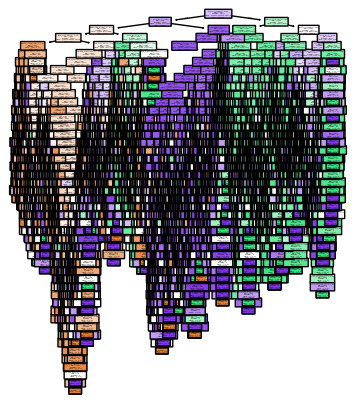

In [70]:
plt.figure(figsize=(4,5))
plot_tree(model , filled=True , rounded=True ,
          class_names=label_encoding.classes_ , 
          feature_names=X.columns)
plt.show()

## `iii` Regularization Mode: On

Let's try contraining the model a bit. Changing the default $max_depth$ parameter.


In [84]:
model_2 = DecisionTreeClassifier(random_state=88 , max_depth=20)
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, random_state=88)

# Fixing the max_depth=20 made the accuracy better

In [94]:
y_predict_2 = model_2.predict(x_test)
print("The Evaluation of The Model : \n" ,classification_report(y_test , y_predict_2))

The Evaluation of The Model : 
               precision    recall  f1-score   support

           0       0.63      0.68      0.65      3663
           1       0.74      0.71      0.73      5735
           2       0.76      0.76      0.76     10602

    accuracy                           0.73     20000
   macro avg       0.71      0.72      0.71     20000
weighted avg       0.73      0.73      0.73     20000



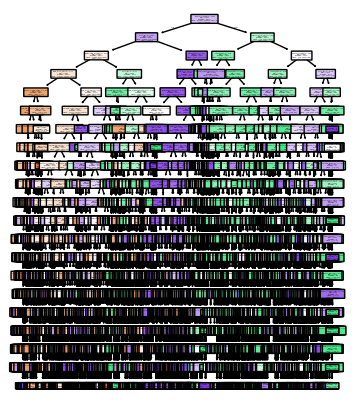

In [86]:
plt.figure(figsize=(4,5))
plot_tree(model_2 , filled=True , rounded=True ,
          class_names=label_encoding.classes_ , 
          feature_names=X.columns)
plt.show()

## `iv` Tuning Hyperparameters

Trying different **reasonable & logical** regularization hyperparameter values and evaluate.


In [87]:
params = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 20 , 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": [None, "sqrt", "log2"]
}

In [89]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params , cv=3 , verbose=3 , n_jobs=-1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [90]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


In [91]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.7106250381912979


In [92]:
model_3 = DecisionTreeClassifier(random_state=88 , max_depth=20  , min_samples_split=5 )
model_3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=88)

In [93]:
y_predict_3 = model_3.predict(x_test)
print("The Evaluation of The Model : \n" ,classification_report(y_test , y_predict_3))

The Evaluation of The Model : 
               precision    recall  f1-score   support

           0       0.63      0.68      0.65      3663
           1       0.73      0.71      0.72      5735
           2       0.76      0.75      0.76     10602

    accuracy                           0.73     20000
   macro avg       0.71      0.72      0.71     20000
weighted avg       0.73      0.73      0.73     20000



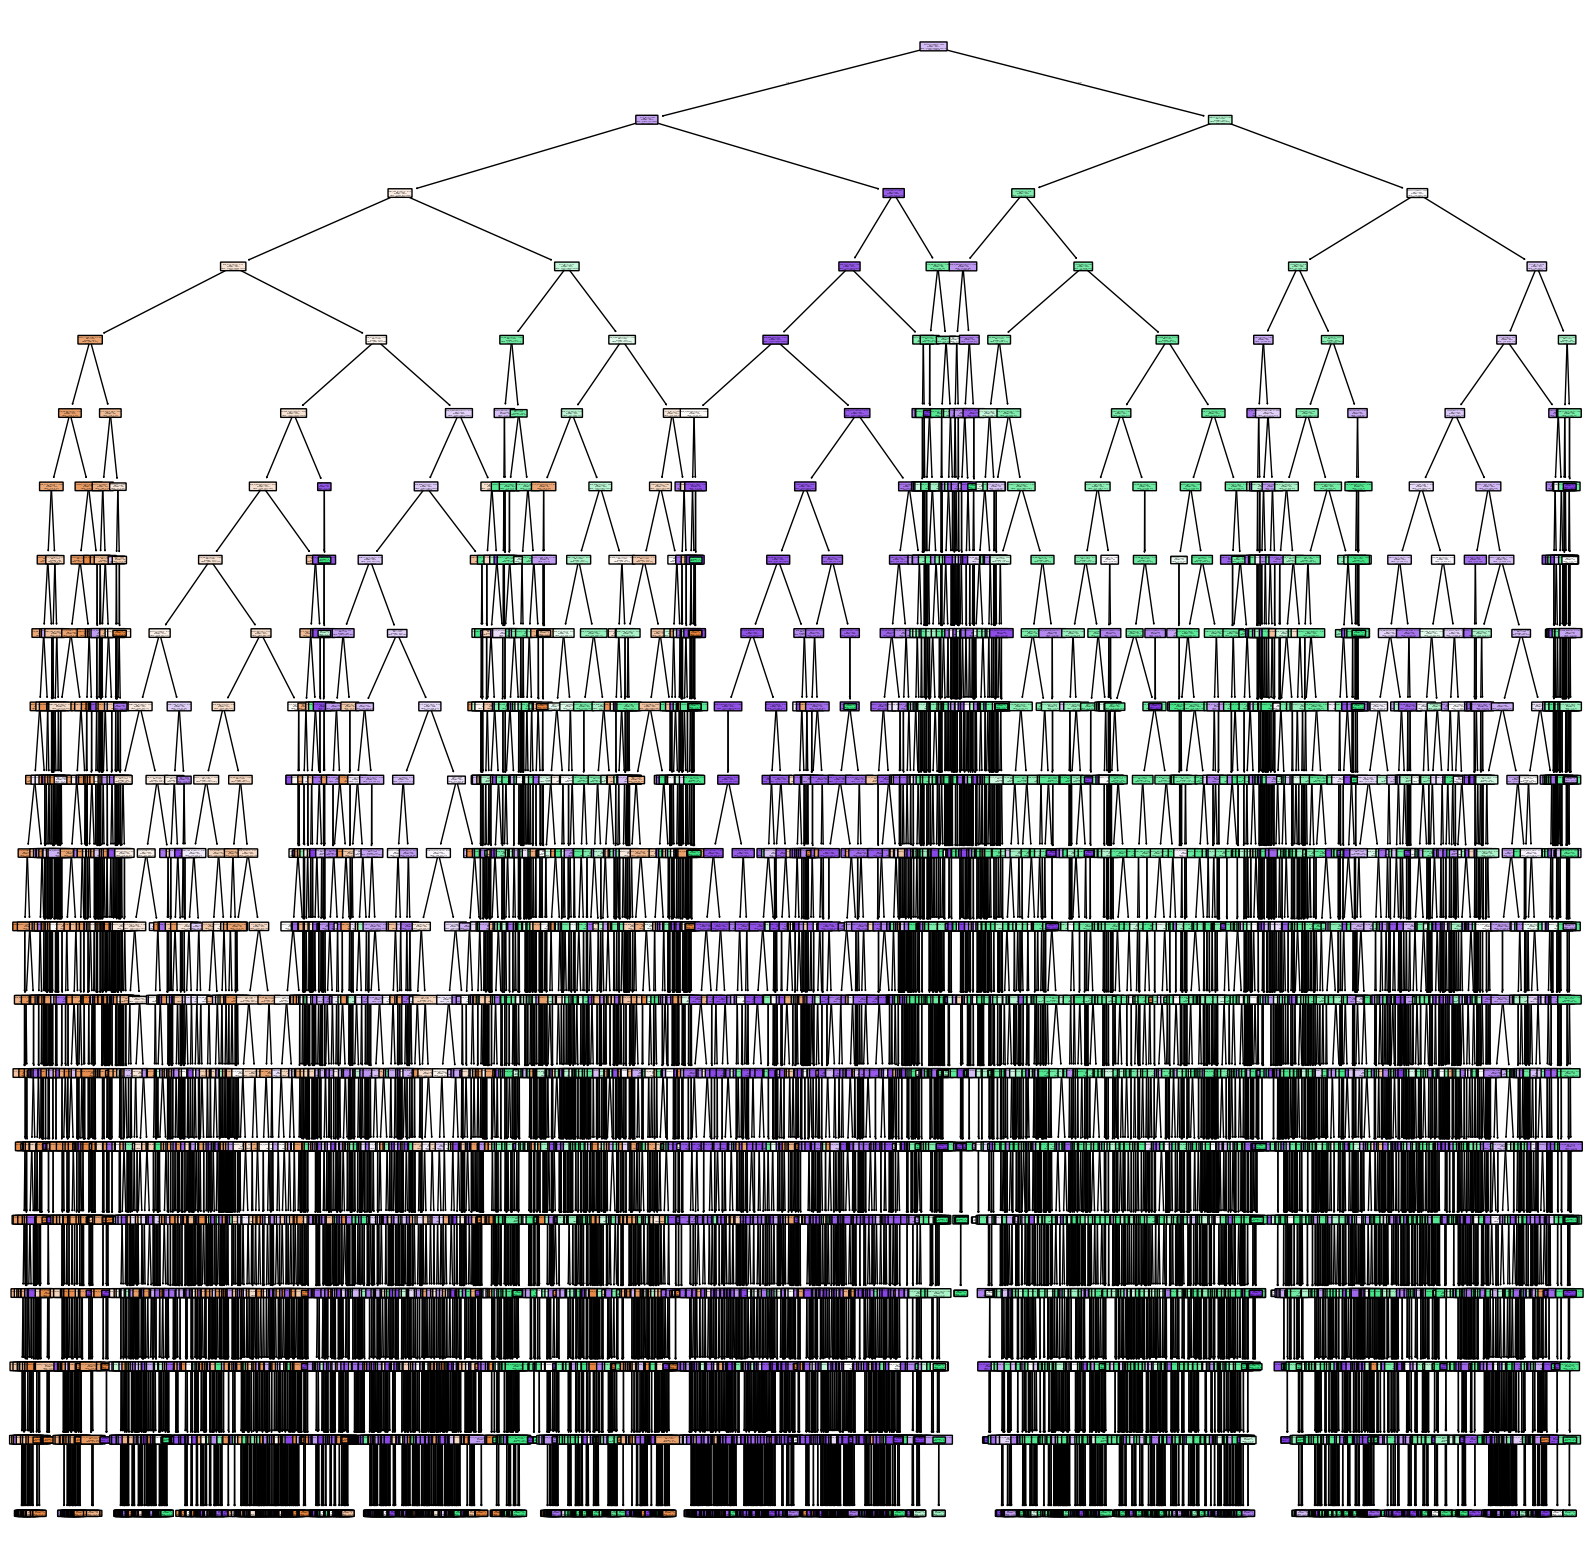

In [105]:
plt.figure(figsize=(20,20))
plot_tree(model_3, filled=True , rounded=True ,
          class_names=label_encoding.classes_ , 
          feature_names=X.columns)
plt.show()

## `v` Feature Importance

Explore the feature importances calculated by the best model.


In [97]:
model_3.feature_names_in_

array(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype=object)

In [96]:
model_3.feature_importances_

array([0.03076286, 0.02205072, 0.03014192, 0.02697875, 0.0177956 ,
       0.03107254, 0.05735437, 0.01280383, 0.03230396, 0.05946926,
       0.03055321, 0.05410154, 0.0211758 , 0.16212317, 0.21486655,
       0.0325435 , 0.05023651, 0.00535573, 0.03194637, 0.03037592,
       0.01247714, 0.03351073])

In [99]:
feature_importances = model_3.feature_importances_
feature_names = x_train.columns  

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
importance_df

,Feature,Importance
14,Outstanding_Debt,0.214867
13,Credit_Mix,0.162123
9,Delay_from_due_date,0.059469
6,Interest_Rate,0.057354
11,Changed_Credit_Limit,0.054102
16,Credit_History_Age,0.050237
21,Monthly_Balance,0.033511
15,Credit_Utilization_Ratio,0.032544
8,Type_of_Loan,0.032304
18,Total_EMI_per_month,0.031946


# The most two important features are : 
## `'Outstanding_Debt' and 'Credit_Mix'`

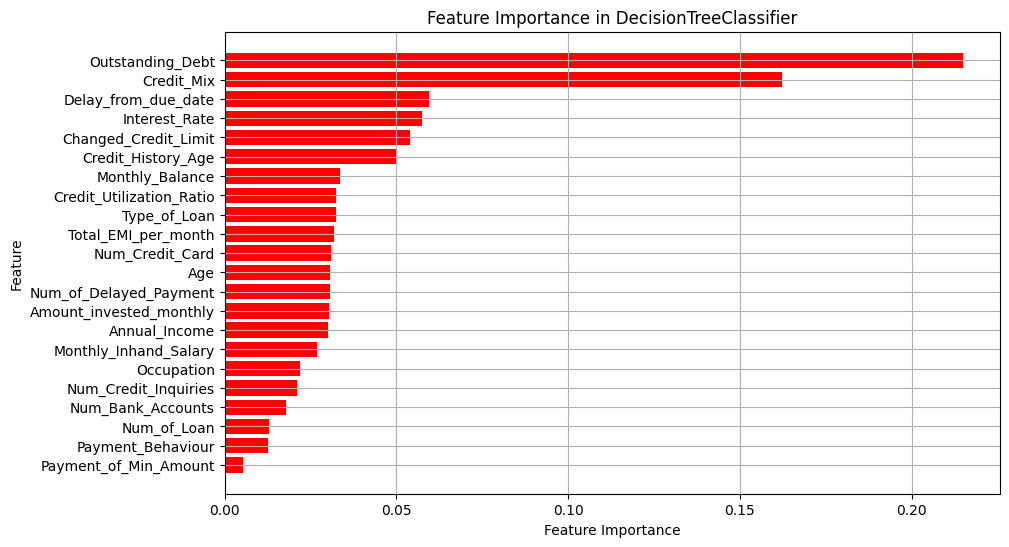

In [103]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='red')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in DecisionTreeClassifier")
plt.gca().invert_yaxis()  
plt.grid()
plt.show()

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [104]:
print(classification_report(y_test,y_predict_3))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65      3663
           1       0.73      0.71      0.72      5735
           2       0.76      0.75      0.76     10602

    accuracy                           0.73     20000
   macro avg       0.71      0.72      0.71     20000
weighted avg       0.73      0.73      0.73     20000



----------------------------------------------

